In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as sts

In [3]:
# Importing csv files
financials = "financials/team_salaries_combined.csv"
financials=pd.read_csv(financials)
matchups = "matchups.csv"
matchups=pd.read_csv(matchups)
matchups

,Team,Year,Offense,Defense,ST,Winner/Loser
0,Ravens,2013,59859476,46729028,3735000,Winner
1,49rs,2013,56353814,53274906,6831666,Loser
2,Seahawks,2014,59250976,48627119,3987500,Winner
3,Broncos,2014,68482945,52253590,4134862,Loser
4,Patriots,2015,67360489,48928609,5163000,Winner
5,Broncos,2016,77437223,52898890,1731766,Winner
6,Patriots,2017,77691138,68546986,7085000,Winner
7,Eagles,2018,83729370,69566123,1672500,Winner
8,Patriots,2019,82692343,81127725,4252097,Winner
9,49rs,2020,92347054,86038773,6851018,NFC


In [4]:
# Cleaning up un-needed columns and teams not in superbowl for that year
del financials['WIN %']
del financials['SIGNED']
del financials["AVG AGE"]
financials = financials.dropna(how='any')
financials

,RANK,TEAM,ACTIVE,DEAD,Year,Winner/Loser
16,17,49ers,111080375,5256877,2013,Loser
30,31,Ravens,108485383,17514344,2013,Winner
42,11,Seahawks,104081005,17968453,2014,Winner
52,21,Broncos,123313050,9483329,2014,Loser
91,28,Patriots,98735571,19484524,2015,Winner
94,31,Seahawks,115629474,19635133,2015,Loser
99,5,Panthers,98999535,13186584,2016,Loser
109,15,Broncos,112742090,15138349,2016,Winner
148,22,Patriots,129468455,7226565,2017,Winner
154,28,Falcons,147393869,8459139,2017,Loser


In [5]:
# Merging two data frames 
merged_files = pd.merge(financials, matchups)
del merged_files['Team']
merged_files

,RANK,TEAM,ACTIVE,DEAD,Year,Winner/Loser,Offense,Defense,ST
0,17,49ers,111080375,5256877,2013,Loser,56353814,53274906,6831666
1,31,Ravens,108485383,17514344,2013,Winner,59859476,46729028,3735000
2,11,Seahawks,104081005,17968453,2014,Winner,59250976,48627119,3987500
3,21,Broncos,123313050,9483329,2014,Loser,68482945,52253590,4134862
4,28,Patriots,98735571,19484524,2015,Winner,67360489,48928609,5163000
5,31,Seahawks,115629474,19635133,2015,Loser,70473014,51249852,5670000
6,5,Panthers,98999535,13186584,2016,Loser,75199577,42619449,7893290
7,15,Broncos,112742090,15138349,2016,Winner,77437223,52898890,1731766
8,22,Patriots,129468455,7226565,2017,Winner,77691138,68546986,7085000
9,28,Falcons,147393869,8459139,2017,Loser,90699851,59109025,6663334


In [6]:
# Splitting dataframes between winners and losers
winners_df = merged_files.loc[merged_files["Winner/Loser"] == "Winner"]
winners_df

,RANK,TEAM,ACTIVE,DEAD,Year,Winner/Loser,Offense,Defense,ST
1,31,Ravens,108485383,17514344,2013,Winner,59859476,46729028,3735000
2,11,Seahawks,104081005,17968453,2014,Winner,59250976,48627119,3987500
4,28,Patriots,98735571,19484524,2015,Winner,67360489,48928609,5163000
7,15,Broncos,112742090,15138349,2016,Winner,77437223,52898890,1731766
8,22,Patriots,129468455,7226565,2017,Winner,77691138,68546986,7085000
11,20,Eagles,186392624,1178217,2018,Winner,83729370,69566123,1672500
13,23,Patriots,156580357,25721180,2019,Winner,82692343,81127725,4252097


In [7]:
loser_df = merged_files.loc[merged_files["Winner/Loser"] == "Loser"]
loser_df

,RANK,TEAM,ACTIVE,DEAD,Year,Winner/Loser,Offense,Defense,ST
0,17,49ers,111080375,5256877,2013,Loser,56353814,53274906,6831666
3,21,Broncos,123313050,9483329,2014,Loser,68482945,52253590,4134862
5,31,Seahawks,115629474,19635133,2015,Loser,70473014,51249852,5670000
6,5,Panthers,98999535,13186584,2016,Loser,75199577,42619449,7893290
9,28,Falcons,147393869,8459139,2017,Loser,90699851,59109025,6663334
10,19,Patriots,154555508,7798489,2018,Loser,82677172,72223999,7860000
12,20,Rams,162335989,13556018,2019,Loser,85063749,73906761,6012000


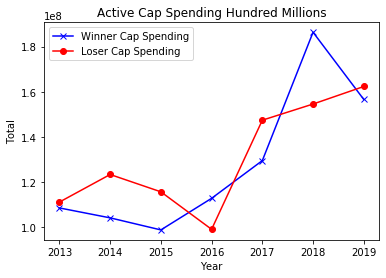

In [8]:
year=[2013,2014,2015,2016,2017,2018,2019]
winner_active_cap=[108485383,104081005,98735571,112742090,129468455,186392624,156580357]
loser_active_cap=[111080375,123313050,115629474,98999535,147393869,154555508,162335989]
winners, = plt.plot(year, winner_active_cap, color="b", marker="x", label="Winner Cap Spending")
losers, = plt.plot(year, loser_active_cap, color="r", marker="o", label="Loser Cap Spending")
plt.title("Active Cap Spending Hundred Millions")
plt.xlabel("Year")
plt.ylabel("Total")
plt.legend(handles=[winners, losers], loc="best")
plt.savefig("cap_spending.png")

In [9]:
KC_Chiefs= merged_files.loc[merged_files["Winner/Loser"] == "AFC"]
SF_49ers= merged_files.loc[merged_files["Winner/Loser"] == "NFC"]
print(SF_49ers)
print(KC_Chiefs)

    RANK   TEAM     ACTIVE    DEAD  Year Winner/Loser   Offense   Defense  \
14    24  49ers  187856988  298687  2020          NFC  92347054  86038773   

         ST  
14  6851018  
    RANK    TEAM     ACTIVE     DEAD  Year Winner/Loser    Offense   Defense  \
15    25  Chiefs  195296465  8174041  2020          AFC  101825500  79482297   

         ST  
15  6815000  


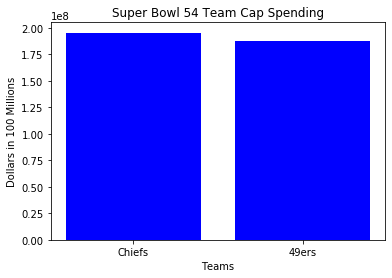

In [10]:
Team = ["Chiefs", "49ers"]
Cap_spending = [195296465, 187856988]
x_axis = np.arange(len(Cap_spending))
plt.bar(x_axis, Cap_spending, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Team)
plt.title("Super Bowl 54 Team Cap Spending")
plt.xlabel("Teams")
plt.ylabel("Dollars in 100 Millions")
plt.savefig("SuperBowl54_cap_spending.png")

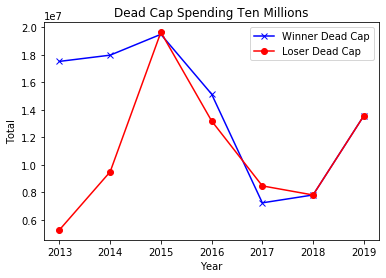

In [11]:
winner_dead_cap=[17514344,17968453,19484524,15138349,7226565,7798489,13556018]
loser_dead_cap=[5256877,9483329,19635133,13186584,8459139,7798489,13556018]
winners, = plt.plot(year, winner_dead_cap, color="b", marker="x", label="Winner Dead Cap")
losers, = plt.plot(year, loser_dead_cap, color="r", marker="o", label="Loser Dead Cap")
plt.title("Dead Cap Spending Ten Millions")
plt.xlabel("Year")
plt.ylabel("Total")
plt.legend(handles=[winners, losers], loc="best")
plt.savefig("dead_cap_spending.png")


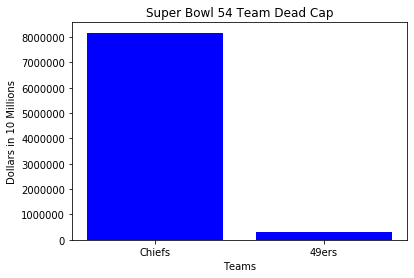

In [12]:
Team = ["Chiefs", "49ers"]
Dead_Cap = [8174041, 298687]
x_axis = np.arange(len(Dead_Cap))
plt.bar(x_axis, Dead_Cap, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Team)
plt.title("Super Bowl 54 Team Dead Cap")
plt.xlabel("Teams")
plt.ylabel("Dollars in 10 Millions")
plt.savefig("SuperBowl54_dead_cap.png")

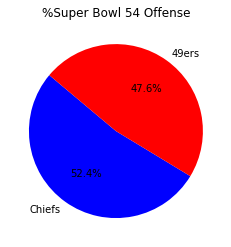

In [13]:
chiefs_offense = KC_Chiefs["Offense"].sum()
SF_49ers_offense = SF_49ers["Offense"].sum()
chiefs_offense
SF_49ers_offense
# Labels for the sections of our pie chart
labels = ["Chiefs", "49ers"]


# The values of each section of the pie chart
offense_sums = [101825500, 92347054]

# The colors of each section of the pie chart
colors = ["b", "r"]
plt.pie(offense_sums, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.title("%Super Bowl 54 Offense")
plt.savefig("%sp54_offense_spending.png")

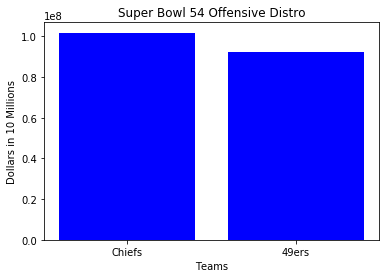

In [14]:
Team = ["Chiefs", "49ers"]
Offense = [101825500, 92347054]
x_axis = np.arange(len(Offense))
plt.bar(x_axis, Offense, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Team)
plt.title("Super Bowl 54 Offensive Distro")
plt.xlabel("Teams")
plt.ylabel("Dollars in 10 Millions")
plt.savefig("SuperBowl54_offensive_spending.png")

In [15]:
chiefs_offense = KC_Chiefs["Offense"].sum()
SF_49ers_offense = SF_49ers["Offense"].sum()
print(chiefs_offense)
print(SF_49ers_offense)

101825500
92347054


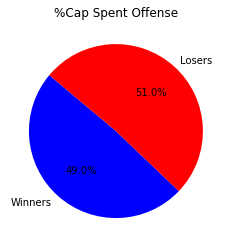

In [16]:
winner_offense = winners_df["Offense"].sum()-92347054
loser_offense = loser_df["Offense"].sum()-101825500
winner_offense
loser_offense
# Labels for the sections of our pie chart
labels = ["Winners", "Losers"]

# The values of each section of the pie chart
offense_sums = [508021015, 528950122]

# The colors of each section of the pie chart
colors = ["b", "r"]
plt.pie(offense_sums, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.title("%Cap Spent Offense")
plt.savefig("%offense_spending.png")

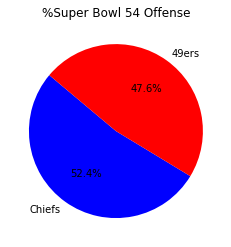

In [17]:
chiefs_offense = KC_Chiefs["Offense"].sum()
SF_49ers_offense = SF_49ers["Offense"].sum()
chiefs_offense
SF_49ers_offense
# Labels for the sections of our pie chart
labels = ["Chiefs", "49ers"]


# The values of each section of the pie chart
offense_sums = [101825500, 92347054]

# The colors of each section of the pie chart
colors = ["b", "r"]
plt.pie(offense_sums, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.title("%Super Bowl 54 Offense")
plt.savefig("%sp54_offense_spending.png")

In [18]:
chiefs_defense = KC_Chiefs["Defense"].sum()
SF_49ers_defense = KC_Chiefs["Defense"].sum()
print(chiefs_defense)
print(SF_49ers_defense)

79482297
79482297


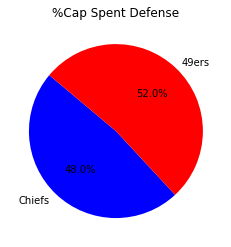

In [19]:
# Labels for the sections of our pie chart
labels = ["Chiefs", "49ers"]

# The values of each section of the pie chart
defense_sums = [79482297, 86038773]

# The colors of each section of the pie chart
colors = ["b", "r"]
plt.pie(defense_sums, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.title("%Cap Spent Defense")
plt.savefig("%defense_spending.png")

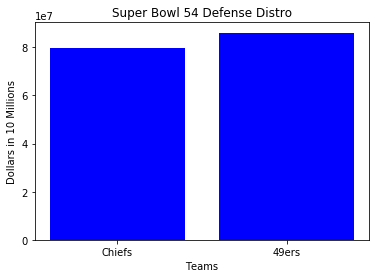

In [20]:
Team = ["Chiefs", "49ers"]
Defense = [79482297, 86038773]
x_axis = np.arange(len(Defense))
plt.bar(x_axis, Defense, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Team)
plt.title("Super Bowl 54 Defense Distro")
plt.xlabel("Teams")
plt.ylabel("Dollars in 10 Millions")
plt.savefig("SuperBowl54_Defense_spending.png")

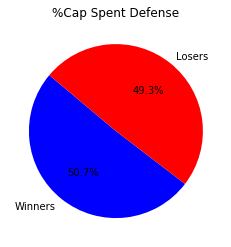

In [21]:
winner_defense = winners_df["Defense"].sum()-86038773
loser_defense = loser_df["Defense"].sum()-79482297
winner_defense
loser_defense
# Labels for the sections of our pie chart
labels = ["Winners", "Losers"]

# The values of each section of the pie chart
defense_sums = [416424480, 404637582]

# The colors of each section of the pie chart
colors = ["b", "r"]
plt.pie(defense_sums, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.title("%Cap Spent Defense")
plt.savefig("%defense_spending.png")

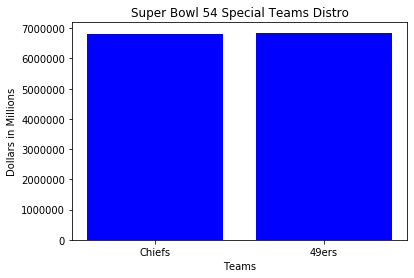

In [22]:
Team = ["Chiefs", "49ers"]
ST = [6815000, 6851018]
x_axis = np.arange(len(ST))
plt.bar(x_axis, ST, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Team)
plt.title("Super Bowl 54 Special Teams Distro")
plt.xlabel("Teams")
plt.ylabel("Dollars in Millions")
plt.savefig("SuperBowl54_ST_spending.png")

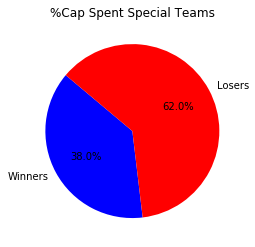

In [23]:
winner_st = winners_df["ST"].sum()-6851018
loser_st = loser_df["ST"].sum()-6815000
winner_st
loser_st
# Labels for the sections of our pie chart
labels = ["Winners", "Losers"]

# The values of each section of the pie chart
st_sums = [27626863, 45065152]

# The colors of each section of the pie chart
colors = ["b", "r"]
plt.pie(st_sums, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.title("%Cap Spent Special Teams")
plt.savefig("%special_teams_spending.png")